In [ ]:
import numpy as np
import h5py
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, LeakyReLU, Flatten, Input, LSTM, Reshape, TimeDistributed
from tensorflow.keras.models import Model
import argparse
import matplotlib.pyplot as plt
import sys

In [ ]:
np.set_printoptions(threshold=5)

In [ ]:
dset = h5py.File("sdr_train.hdf5", 'r')
X = dset['X'][()]
y = dset['y'][()]

In [ ]:
X.shape

(112464, 1024, 2)

In [ ]:
A = y

matches0 = np.where(np.all(A == [0, 0, 0, 0], axis=1))[0]
matches1 = np.where(np.all(A == [0, 0, 0, 1], axis=1))[0]
matches2 = np.where(np.all(A == [0, 0, 1, 0], axis=1))[0]
matches3 = np.where(np.all(A == [0, 0, 1, 1], axis=1))[0]
matches4 = np.where(np.all(A == [0, 1, 0, 0], axis=1))[0]
matches5 = np.where(np.all(A == [0, 1, 0, 1], axis=1))[0]
matches6 = np.where(np.all(A == [0, 1, 1, 0], axis=1))[0]
matches7 = np.where(np.all(A == [0, 1, 1, 1], axis=1))[0]
matches8 = np.where(np.all(A == [1, 0, 0, 0], axis=1))[0]
matches9 = np.where(np.all(A == [1, 0, 0, 1], axis=1))[0]
matches10 = np.where(np.all(A == [1, 0, 1, 0], axis=1))[0]
matches11 = np.where(np.all(A == [1, 0, 1, 1], axis=1))[0]
matches12 = np.where(np.all(A == [1, 1, 0, 0], axis=1))[0]
matches13 = np.where(np.all(A == [1, 1, 0, 1], axis=1))[0]
matches14 = np.where(np.all(A == [1, 1, 1, 0], axis=1))[0]
matches15 = np.where(np.all(A == [1, 1, 1, 1], axis=1))[0]

my_list = list(A)

value_to_replace = 0
for index in matches0:
    my_list[index] = value_to_replace
value_to_replace = 1
for index in matches1:
    my_list[index] = value_to_replace
value_to_replace = 2
for index in matches2:
    my_list[index] = value_to_replace
value_to_replace = 3
for index in matches3:
    my_list[index] = value_to_replace
value_to_replace = 4
for index in matches4:
    my_list[index] = value_to_replace
value_to_replace = 5
for index in matches5:
    my_list[index] = value_to_replace
value_to_replace = 6
for index in matches6:
    my_list[index] = value_to_replace
value_to_replace = 7
for index in matches7:
    my_list[index] = value_to_replace
value_to_replace = 8
for index in matches8:
    my_list[index] = value_to_replace
value_to_replace = 9
for index in matches9:
    my_list[index] = value_to_replace
value_to_replace = 10
for index in matches10:
    my_list[index] = value_to_replace
value_to_replace = 11
for index in matches11:
    my_list[index] = value_to_replace
value_to_replace = 12
for index in matches12:
    my_list[index] = value_to_replace
value_to_replace = 13
for index in matches13:
    my_list[index] = value_to_replace
value_to_replace = 14
for index in matches14:
    my_list[index] = value_to_replace
value_to_replace = 15
for index in matches15:
    my_list[index] = value_to_replace

y_label = np.array(my_list)

my_dict = {0: [0, 0, 0, 0],
           1: [0, 0, 0, 1],
           2: [0, 0, 1, 0],
           3: [0, 0, 1, 1],
           4: [0, 1, 0, 0],
           5: [0, 1, 0, 1],
           6: [0, 1, 1, 0],
           7: [0, 1, 1, 1],
           8: [1, 0, 0, 0],
           9: [1, 0, 0, 1],
           10: [1, 0, 1, 0],
           11: [1, 0, 1, 1],
           12: [1, 1, 0, 0],
           13: [1, 1, 0, 1],
           14: [1, 1, 1, 0],
           15: [1, 1, 1, 1]}


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1024,2)),
    tf.keras.layers.Reshape(target_shape=(1024,2,1)),
    tf.keras.layers.Conv2D(32, (3, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (3, 2), activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(16, activation='softmax'),
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)             │ (None, 1024, 2, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 1024, 2, 32)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 1024, 2, 32)    │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,397,200 (32.03 MB)

 Trainable params: 8,397,200 (32.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 50
validation_split = 0.1

history = model.fit(X, y_label, epochs=NUM_EPOCHS, validation_split=validation_split,verbose =1)

Epoch 1/50
3164/3164 ━━━━━━━━━━━━━━━━━━━━ 47s 14ms/step - accuracy: 0.4571 - loss: 1.6815 - val_accuracy: 0.6134 - val_loss: 1.2442
Epoch 2/50
3164/3164 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.6140 - loss: 1.2322 - val_accuracy: 0.6130 - val_loss: 1.2467
Epoch 3/50
3164/3164 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.6142 - loss: 1.2237 - val_accuracy: 0.6128 - val_loss: 1.2447
Epoch 4/50
3164/3164 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.6136 - loss: 1.2275 - val_accuracy: 0.6102 - val_loss: 1.2503
Epoch 5/50
3164/3164 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.6161 - loss: 1.2216 - val_accuracy: 0.6067 - val_loss: 1.2635
Epoch 6/50
3164/3164 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.6162 - loss: 1.2211 - val_accuracy: 0.6126 - val_loss: 1.2523
Epoch 7/50
3164/3164 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.6168 - loss: 1.2155 - val_accuracy: 0.6125 - val_loss: 1.2541
Epoch 8/50
3164/3164 ━━━━━━━━━━━━━━━━━━━━ 82s 13ms/step - accuracy: 0.6226 -

In [ ]:
model.save("Model_keras.keras")

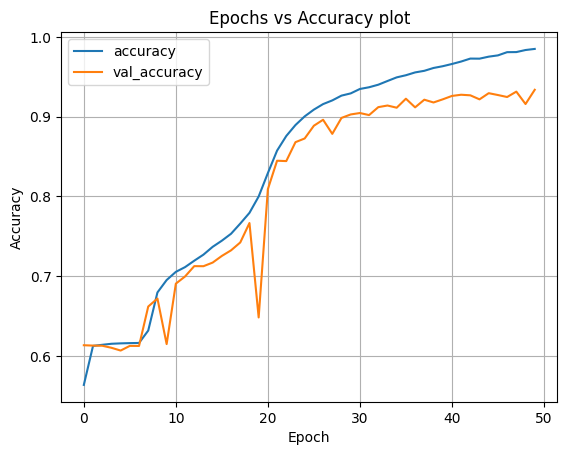

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy plot')
plt.legend()
plt.grid(True)
plt.show()

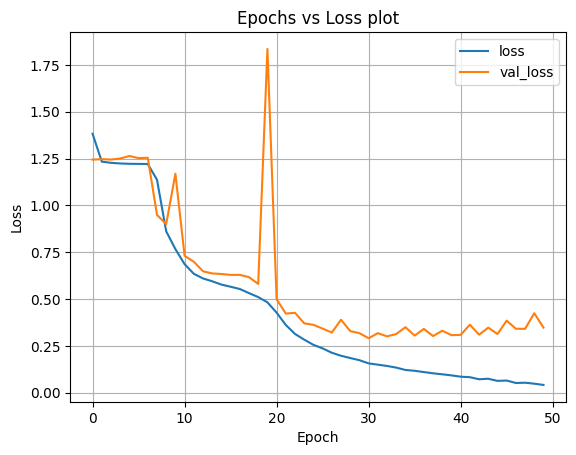

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epochs vs Loss plot')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
test_dset = h5py.File("sdr_test.hdf5", 'r')
X_test = test_dset['X'][()]
y_test = test_dset['y'][()]

In [ ]:
X_test.shape

(12497, 1024, 2)

In [ ]:
B = y_test

test_matches0 = np.where(np.all(B == [0, 0, 0, 0], axis=1))[0]
test_matches1 = np.where(np.all(B == [0, 0, 0, 1], axis=1))[0]
test_matches2 = np.where(np.all(B == [0, 0, 1, 0], axis=1))[0]
test_matches3 = np.where(np.all(B == [0, 0, 1, 1], axis=1))[0]
test_matches4 = np.where(np.all(B == [0, 1, 0, 0], axis=1))[0]
test_matches5 = np.where(np.all(B == [0, 1, 0, 1], axis=1))[0]
test_matches6 = np.where(np.all(B == [0, 1, 1, 0], axis=1))[0]
test_matches7 = np.where(np.all(B == [0, 1, 1, 1], axis=1))[0]
test_matches8 = np.where(np.all(B == [1, 0, 0, 0], axis=1))[0]
test_matches9 = np.where(np.all(B == [1, 0, 0, 1], axis=1))[0]
test_matches10 = np.where(np.all(B == [1, 0, 1, 0], axis=1))[0]
test_matches11 = np.where(np.all(B == [1, 0, 1, 1], axis=1))[0]
test_matches12 = np.where(np.all(B == [1, 1, 0, 0], axis=1))[0]
test_matches13 = np.where(np.all(B == [1, 1, 0, 1], axis=1))[0]
test_matches14 = np.where(np.all(B == [1, 1, 1, 0], axis=1))[0]
test_matches15 = np.where(np.all(B == [1, 1, 1, 1], axis=1))[0]

test_list = list(B)


value_to_replace = 0
for index in test_matches0:
    test_list[index] = value_to_replace
value_to_replace = 1
for index in test_matches1:
    test_list[index] = value_to_replace
value_to_replace = 2
for index in test_matches2:
    test_list[index] = value_to_replace
value_to_replace = 3
for index in test_matches3:
    test_list[index] = value_to_replace
value_to_replace = 4
for index in test_matches4:
    test_list[index] = value_to_replace
value_to_replace = 5
for index in test_matches5:
    test_list[index] = value_to_replace
value_to_replace = 6
for index in test_matches6:
    test_list[index] = value_to_replace
value_to_replace = 7
for index in test_matches7:
    test_list[index] = value_to_replace
value_to_replace = 8
for index in test_matches8:
    test_list[index] = value_to_replace
value_to_replace = 9
for index in test_matches9:
    test_list[index] = value_to_replace
value_to_replace = 10
for index in test_matches10:
    test_list[index] = value_to_replace
value_to_replace = 11
for index in test_matches11:
    test_list[index] = value_to_replace
value_to_replace = 12
for index in test_matches12:
    test_list[index] = value_to_replace
value_to_replace = 13
for index in test_matches13:
    test_list[index] = value_to_replace
value_to_replace = 14
for index in test_matches14:
    test_list[index] = value_to_replace
value_to_replace = 15
for index in test_matches15:
    test_list[index] = value_to_replace

test_label = np.array(test_list)


In [ ]:
score = model.evaluate(X_test, test_label, verbose=1)
print('Loss: ' + str(score[0]))
print('Acc: ' + str(score[1]))

391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9312 - loss: 0.4085
Loss: 0.3589571714401245
Acc: 0.9311834573745728


391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


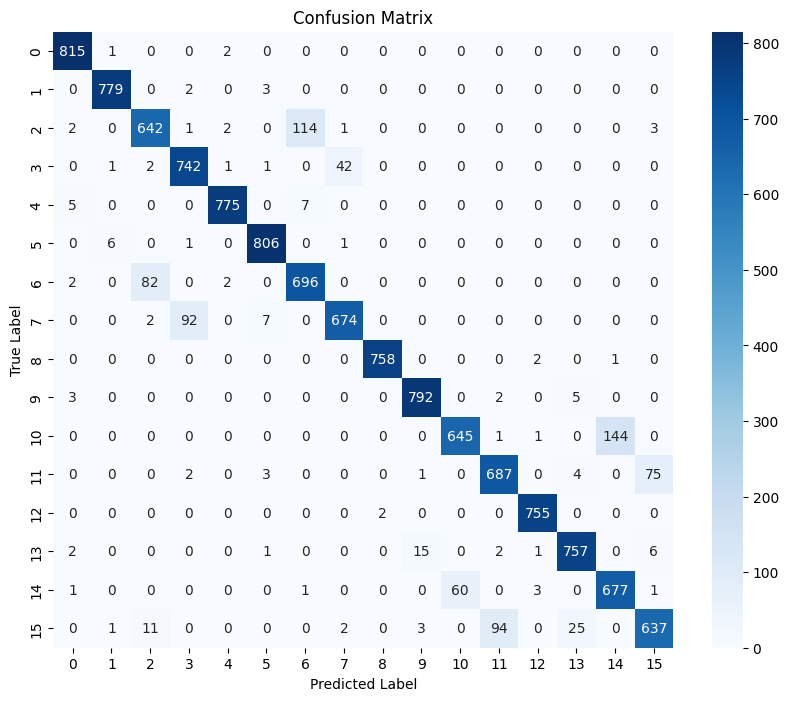